In [1]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
from utils import collect_all_instruments_ids, collect_single_instrument_data
warnings.filterwarnings("ignore")

## Соберем все id-щники и опционы, которым они соответсвуют

In [2]:
# все id-шники
instruments_df = collect_all_instruments_ids()
instruments_df.head(5)

,instrument_name,instrument_id
0,BTC-31OCT22-17000-C,140792
1,BTC-31OCT22-17000-P,140793
2,BTC-31OCT22-18000-C,140795
3,BTC-31OCT22-18000-P,140798
4,BTC-31OCT22-18500-C,140800


## Собираем данные по конкретному опциону

In [3]:
# по конкретному опциону
single_option = collect_single_instrument_data(instrument_id = int(instruments_df.sample(1).iloc[0].instrument_id), number_of_ticks = 100)
single_option.head(5)

2022-10-30 18:20:49.607 | INFO     | utils:call_api:68 - Collected 100 ticks for id = 130657


,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp,strike
0,BTC-30JUN23-30000-C,1667143242344,20869.92,71.56,0.1112,0.0,0.0,2022-10-30 18:20:42.344000,30000
6,BTC-30JUN23-30000-C,1667143243356,20869.96,71.56,0.1112,0.0,0.0,2022-10-30 18:20:43.356000,30000
22,BTC-30JUN23-30000-C,1667143244360,20868.55,71.56,0.1112,0.0,0.0,2022-10-30 18:20:44.360000,30000
36,BTC-30JUN23-30000-C,1667143245366,20868.19,71.56,0.1112,0.0,0.0,2022-10-30 18:20:45.366000,30000
51,BTC-30JUN23-30000-C,1667143246373,20867.50,71.56,0.1112,0.0,0.0,2022-10-30 18:20:46.373000,30000


## Собираем по одному тику для каждого опциона с одинаковым временем экспирации, чтобы узнать все страйки и их рыночные волатильности

2022-10-30 18:20:50.018 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140792
2022-10-30 18:20:50.421 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140793
2022-10-30 18:20:50.808 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140795
2022-10-30 18:20:51.152 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140798
2022-10-30 18:20:51.533 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140800
2022-10-30 18:20:51.900 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140802
2022-10-30 18:20:52.265 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140804
2022-10-30 18:20:52.631 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140807
2022-10-30 18:20:53.020 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140809
2022-10-30 18:20:53.382 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140811
2022-10-30 18:20:53.737 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 140813

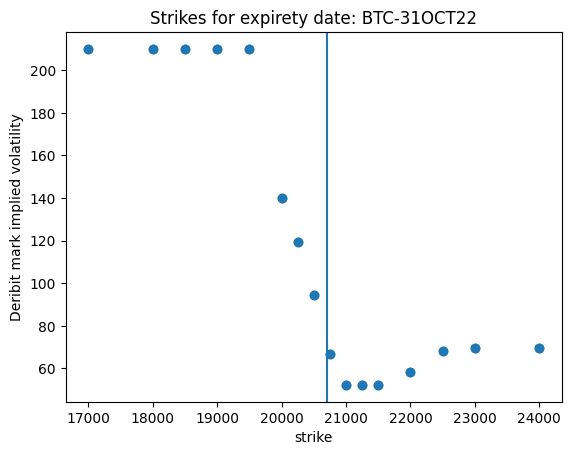

In [4]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
]
single_strike_ids = single_strike.instrument_id.to_list()

options = pd.DataFrame(columns = single_option.columns.values)
for op_id in single_strike_ids:
    try:
        option = collect_single_instrument_data(instrument_id = op_id, number_of_ticks = 1)
        options = options.append(option)
    except:
        continue
    
plt.scatter(options["strike"], options["mark_iv"])
plt.axvline(x=option.iloc[0]["underlying_price"])
plt.xlabel("strike")
plt.ylabel("Deribit mark implied volatility")
exp_date = options.iloc[0].instrument_name[:11]
plt.title(f"Strikes for expirety date: {exp_date}")
plt.show()

options.to_pickle(f"data/{exp_date}.pkl")